In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# # Walk through "data" folder, printing directories and files 
# # to use their names for file paths

# for root, dirs, files in os.walk("data"):
#     print("Current Directory:", root)
#     print()
#     print("Subdirectories:", dirs)
#     print()
#     print("Files:", files)

In [3]:
main_dir = 'data/processed'
file_name = 'customer_segmentation.csv'
file_path = os.path.join(main_dir, file_name)

In [4]:
df = pd.read_csv(file_path, index_col='Customer ID')

In [5]:
df.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
Customer ID,,,,,,,,,,,,,,,,,,,,,
101,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
102,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
103,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,0.333333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
105,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,0.666667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# use Elbow Method and Silhouette 

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows wi

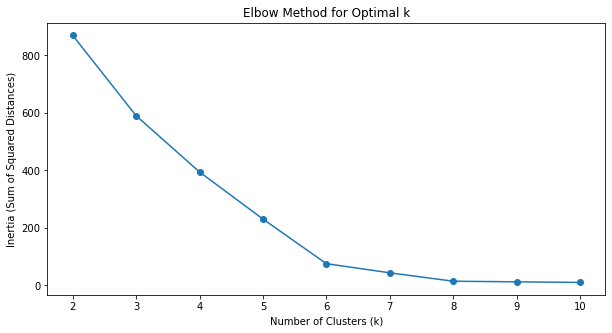

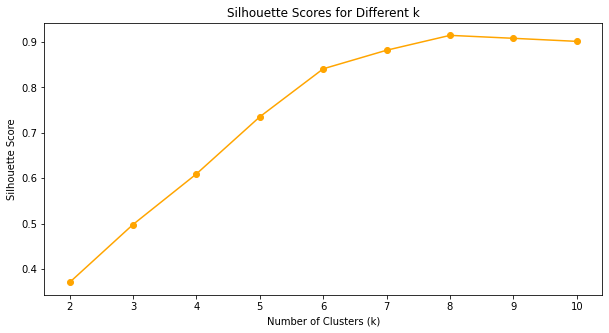

In [6]:
# Store the inertia (sum of squared distances) and silhouette scores
inertia = []
silhouette_scores = []

# Iterate over different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  # Assuming 'data' contains your normalized dataset

    # Append inertia and silhouette scores
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


In [7]:
# Save the optimal k to a text file
optimal_k = 6  # Example value, based on Elbow and Silhouette
with open("Data/optimal_k.txt", "w") as file:
    file.write(str(optimal_k))